In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
omega_m_values, chi2 = np.load("chi2desi.php")

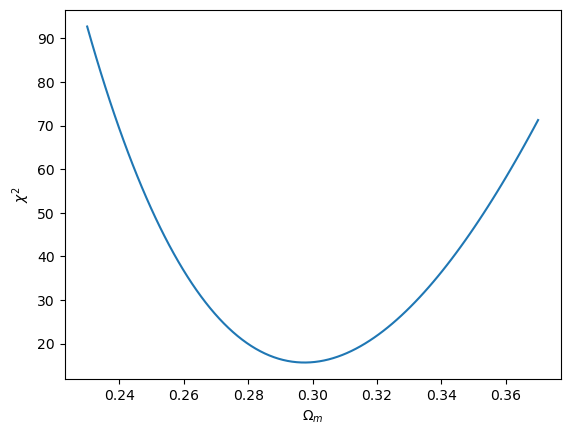

In [5]:
plt.plot(omega_m_values, chi2)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$\chi^2$")
plt.show()

In [6]:
# Calcola la probabilità a posteriori non normalizzata
posterior = np.exp(-chi2 / 2.0)

# Normalizza la probabilità a posteriori
posterior = posterior / np.trapz(posterior, omega_m_values)


/var/folders/xy/lbzxg6rn2xzgh0qsqvgchmz40000gn/T/ipykernel_6611/1459916547.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior = posterior / np.trapz(posterior, omega_m_values)


In [7]:
#interpolate posterior
from scipy.interpolate import interp1d
interp_posterior=interp1d(omega_m_values, posterior,kind='cubic')

In [8]:
K=1.01*np.max(posterior)

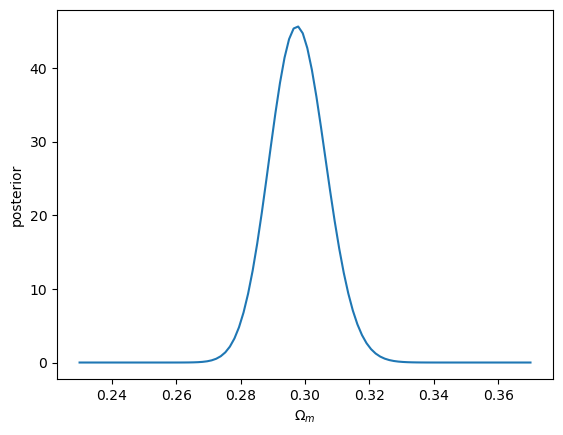

In [9]:
plt.plot(omega_m_values,posterior)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"posterior")
plt.show()

In [10]:
n_attemps=10000

omega_m_try=np.random.uniform(0.23,0.37,n_attemps)
u=np.random.uniform(0,1,n_attemps)

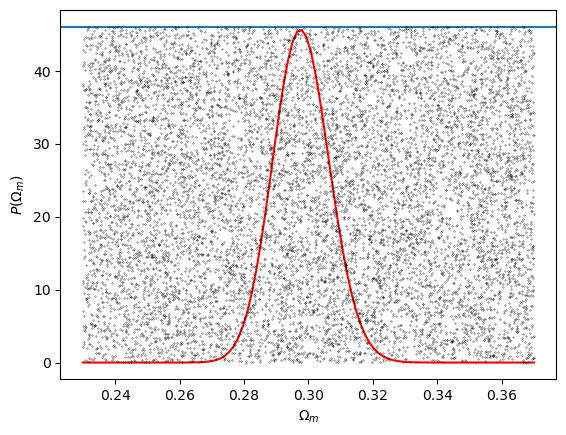

In [11]:
plt.plot(omega_m_values,posterior, "r")
plt.axhline(K)
plt.plot(omega_m_try, u*K,".", ms="0.5", color="k")
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_m)$")
plt.show()

In [12]:
ff=interp_posterior(omega_m_try)
qq=K
acc = ff>K*u

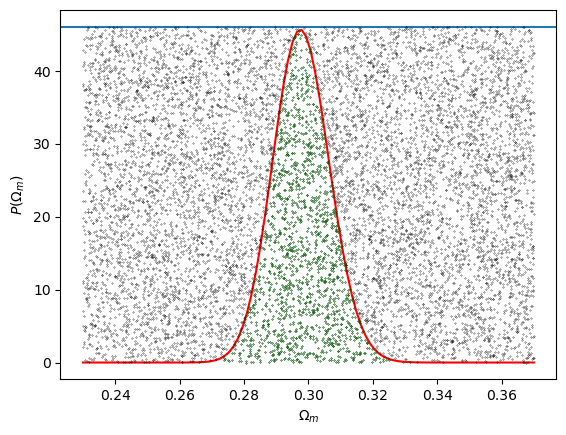

In [13]:
plt.plot(omega_m_values,posterior, "r")
plt.axhline(K)
plt.plot(omega_m_try, u*K,".", ms="0.5", color="k")
plt.plot(omega_m_try[acc], u[acc]*K,".", ms="0.5", color="g")
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_m)$")
plt.show()

In [14]:
media_accettati = np.mean(omega_m_try[acc])
varianza_accettati = np.var(omega_m_try[acc])

print(f"Media dei punti accettati: {media_accettati}")
print(f"Varianza dei punti accettati: {varianza_accettati}")

Media dei punti accettati: 0.2981841202705108
Varianza dei punti accettati: 7.562061225675168e-05
